# Find in data intersection between dispersions $\sigma$ and gas profiles $\Sigma(R)$

In [2]:
import requests
import time
from IPython.display import HTML
from IPython.display import Image
import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [26]:
class SurveyCard(dict):
    # Overridden dict class which takes a dict
    # and renders an HTML Table in IPython Notebook.
    def _repr_html_(self):
        html = ["<table width=40%>"]
        for key, value in sorted(self.iteritems(), reverse=True):
            html.append("<tr>")
            html.append("<td>{0}</td>".format(key))
            html.append("<td>{0}</td>".format(value))
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

# Astroquery.ned

https://astroquery.readthedocs.io/en/latest/ned/ned.html

In [2]:
from astroquery.ned import Ned

In [4]:
result_table = Ned.query_object("NGC 338")

In [5]:
print result_table

No. Object Name  RA(deg)   ... Redshift Points Diameter Points Associations
                 degrees   ...                                             
--- ----------- ---------- ... --------------- --------------- ------------
  1    NGC 0338   15.15171 ...              12               8            1


In [9]:
from astropy.io import fits

In [10]:
image_list = Ned.get_image_list("n338")
image_list

[u'http://ned.ipac.caltech.edu/dss1B2/Bc/NGC_0338:I:103aE:dss1.fits.gz',
 u'http://ned.ipac.caltech.edu/img/2007WHISP.C.......:/UGC_00624_HR:I:21cm:h2002.fits.gz',
 u'http://ned.ipac.caltech.edu/img/2007WHISP.C.......:/UGC_00624_LR:I:21cm:h2002.fits.gz',
 u'http://ned.ipac.caltech.edu/img/2007WHISP.C.......:/UGC_00624_FR:I:21cm:h2002.fits.gz',
 u'http://ned.ipac.caltech.edu/img/2011MNRAS.416.2437H/UGC_00624cl:I:HI:h2011.fits.gz',
 u'http://ned.ipac.caltech.edu/img/2011MNRAS.416.2437H/UGC_00624s30cl:I:HI:h2011.fits.gz',
 u'http://ned.ipac.caltech.edu/img/2011MNRAS.416.2437H/UGC_00624s60cl:I:HI:h2011.fits.gz']

In [37]:
image_data = fits.getdata('http://ned.ipac.caltech.edu/dss1B2/Bc/NGC_0338:I:103aE:dss1.fits.gz', ext=0)

In [38]:
image_data.shape

(212L, 212L)

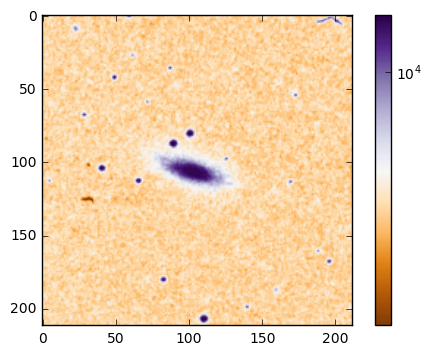

In [42]:
plt.figure()
from matplotlib.colors import LogNorm
plt.imshow(image_data, cmap=cm.PuOr, norm=LogNorm())
plt.colorbar()

## CARMA EDGE

In [27]:
carmaedge_card = {'Name' : 'CARMA EDGE', r'$\Sigma_{\rm{H_2}}$' : '+', r'$\Sigma_{s}$' : '+', r'$\sigma_{s}$' : '+', r'$H_{\alpha} (SFR)$' : '+'}
SurveyCard(carmaedge_card)

Name,CARMA EDGE
$\sigma_{s}$,+
$\Sigma_{s}$,+
$\Sigma_{\rm{H_2}}$,+
$H_{\alpha} (SFR)$,+


In [3]:
#extracted from table in article
carmaedge = '''ARP220 15h34m57.
s3 +23◦30009.
007 Sm 5247 66 30 338 78.0
IC0480 07h55m23.
s1 +26◦44034.
000 Sbc 4595 105 77 168 66.3
IC0540 09h30m10.
s2 +07◦54009.
003 Sb 2022 64 68 350 29.9
IC0944 13h51m30.
s9 +14◦05031.
002 Sa 6907 92 75 106 100.8
IC1151 15h58m32.
s5 +17◦26029.
004 SBc B 2192 134 68 204 30.8
IC1199 16h10m34.
s3 +10◦02024.
003 Sbc 4686 71 64 339 68.3
IC1683 01h22m38.
s8 +34◦26013.
001 Sb 4820 79 55 16 69.7
IC2247 08h15m59.
s0 +23◦11058.
005 Sbc 4254 109 78 328 62.0
IC2487 09h30m09.
s2 +20◦05027.
002 Sb 4310 110 78 163 62.3
IC4566 15h36m42.
s1 +43◦32021.
008 SABb B 5537 81 54 145 80.7
IC5376 00h01m19.
s7 +34◦31032.
005 Sab 4979 98 72 3 72.9
NGC0444 01h15m49.
s6 +31◦04048.
007 Sc 4776 94 75 159 70.1
NGC0447 01h15m37.
s5 +33◦04003.
003 S0-a B 5552 133 29 227 79.7
NGC0477 01h21m20.
s3 +40◦29017.
005 Sc B 5796 93 60 140 85.4
NGC0496 01h23m11.
s5 +33◦31044.
000 Sbc 5958 53 57 36 87.5
NGC0523 01h25m20.
s7 +34◦01029.
000 Sbc M 4760 151 72 277 67.9
NGC0528 01h25m33.
s5 +33◦40017.
004 S0 4638 106 61 58 68.8
NGC0551 01h27m40.
s6 +37◦10058.
004 SBbc B 5141 89 64 315 74.5
NGC1167 03h01m42.
s3 +35◦12020.
005 S0 4797 109 40 88 70.9
NGC2253 06h43m41.
s8 +65◦12022.
003 Sc 3545 86 47 300 51.2
NGC2347 07h16m03.
s9 +64◦42038.
008 Sb R 4387 99 50 189 63.7
NGC2410 07h35m02.
s2 +32◦49019.
005 Sb B 4642 130 72 217 67.5
NGC2480 07h57m10.
s4 +23◦46047.
002 SBd BM 2287 79 55 343 33.1
NGC2486 07h57m56.
s4 +25◦09038.
008 Sa 4569 89 56 93 67.5
NGC2487 07h58m20.
s4 +25◦08057.
001 Sb BR 4795 104 31 118 70.5
NGC2623 08h38m24.
s0 +25◦45014.
007 Sb M 5454 45 46 255 80.2
NGC2639 08h43m38.
s0 +50◦12019.
004 Sa R 3168 97 50 314 45.7
NGC2730 09h02m15.
s7 +16◦50017.
008 Sd B 3727 87 28 261 54.8
NGC2880 09h29m34.
s5 +62◦29026.
001 E-S0 B 1530 140 50 323 22.7
NGC2906 09h32m06.
s2 +08◦26029.
007 Sc 2133 81 56 262 37.7
NGC2916 09h34m57.
s5 +21◦42018.
007 Sb 3620 144 50 200 53.2
NGC2918 09h35m44.
s0 +31◦42019.
008 E 6569 93 46 75 96.6
NGC3303 10h37m00.
s1 +18◦08008.
005 Sa M 6040 66 60 160 89.8
NGC3381 10h48m24.
s8 +34◦42041.
000 SBb B 1625 121 31 333 23.4
NGC3687 11h28m00.
s4 +29◦30039.
005 Sbc BR 2497 84 20 326 36.0
NGC3811 11h41m16.
s8 +47◦41026.
008 SBc BR 3073 122 40 352 44.3
NGC3815 11h41m39.
s1 +24◦48001.
004 Sab 3686 86 60 68 53.6
NGC3994 11h57m36.
s7 +32◦16038.
002 Sc RM 3097 51 60 188 44.7
NGC4047 12h02m50.
s6 +48◦38010.
003 Sb 3419 92 42 104 49.1
NGC4149 12h10m32.
s8 +58◦18014.
007 SABc B 3050 82 66 85 44.1
NGC4185 12h13m22.
s0 +28◦30039.
005 SBbc BR 3874 111 48 344 55.9
NGC4210 12h15m15.
s8 +65◦59007.
004 Sb BR 2714 116 41 278 38.8
NGC4211NED02 12h15m37.
s4 +28◦10010.
005 S0-a M 6605 62 30 25 96.9
NGC4470 12h29m37.
s6 +07◦49026.
000 Sa 2338 77 48 350 33.4
NGC4644 12h42m42.
s8 +55◦08043.
007 Sb BM 4915 91 73 57 71.6
NGC4676A 12h46m10.
s2 +30◦43055.
005 S0-a BM 6541 130 50 185 96.6
NGC4711 12h48m45.
s7 +35◦19057.
007 SBb B 4044 72 58 215 58.8
NGC4961 13h05m47.
s7 +27◦44002.
000 SBc B 2521 67 47 100 36.6
NGC5000 13h09m47.
s5 +28◦54024.
004 Sbc BRM 5557 77 20 31 80.8
NGC5016 13h12m06.
s8 +24◦05041.
000 SABb B 2581 94 40 57 36.9
NGC5056 13h16m12.
s3 +30◦57000.
007 Sc 5550 97 61 178 81.1
NGC5205 13h30m03.
s5 +62◦30041.
003 Sbc 1762 95 50 169 25.1
NGC5218 13h32m10.
s3 +62◦46004.
000 SBb B 2888 110 30 236 41.7
NGC5394 13h58m33.
s6 +37◦27012.
005 SBb BM 3431 158 70 189 49.5
NGC5406 14h00m20.
s1 +38◦54055.
004 Sbc B 5350 102 45 111 77.8
NGC5480 14h06m21.
s5 +50◦43030.
003 Sc 1882 100 42 178 27.0
NGC5485 14h07m11.
s2 +55◦00005.
007 S0 1893 151 47 74 26.9
NGC5520 14h12m22.
s6 +50◦20054.
006 Sb 1870 96 59 245 26.7
NGC5614 14h24m07.
s5 +34◦51032.
000 Sab RM 3859 146 36 270 55.7
NGC5633 14h27m28.
s4 +46◦08047.
000 Sb R 2319 65 42 17 33.4
NGC5657 14h30m43.
s5 +29◦10050.
005 Sb BR 3860 105 68 349 56.3
NGC5682 14h34m45.
s1 +48◦40010.
001 Sb B 2242 39 76 311 32.6
NGC5732 14h40m39.
s0 +38◦38015.
007 Sbc 3723 74 58 43 54.0
NGC5784 14h54m16.
s5 +42◦33028.
000 S0 5427 89 45 255 79.4
NGC5876 15h09m31.
s6 +54◦30023.
004 SBab BR 3240 148 66 51 46.9
NGC5908 15h16m43.
s3 +55◦24033.
008 Sb 3294 202 77 153 47.1
NGC5930 15h26m07.
s7 +41◦40033.
009 SABa BM 2637 111 45 155 37.2
NGC5934 15h28m12.
s7 +42◦55047.
006 Sa M 5566 37 55 5 82.7
NGC5947 15h30m36.
s7 +42◦43001.
009 SBbc B 5898 70 32 249 86.1
NGC5953 15h34m32.
s5 +15◦11037.
006 S0-a M 1988 88 26 48 28.4
NGC5980 15h41m30.
s4 +15◦47015.
003 Sbc 4060 98 66 15 59.4
NGC6004 15h50m22.
s5 +18◦56021.
001 Sc B 3818 114 37 272 55.2
NGC6021 15h57m30.
s6 +15◦57021.
005 E 4673 93 43 157 69.1
NGC6027 15h59m12.
s4 +20◦45047.
008 S0-a BM 4338 137 31 231 62.9
NGC6060 16h05m52.
s0 +21◦29005.
006 SABc BR 4398 114 64 102 63.2
NGC6063 16h07m13.
s0 +07◦58043.
009 Sc 2807 98 56 332 40.7
NGC6081 16h12m56.
s8 +09◦52001.
003 S0 4978 93 66 308 73.5
NGC6125 16h19m11.
s6 +57◦59002.
007 E 4522 83 17 5 68.0
NGC6146 16h25m10.
s1 +40◦53033.
003 E 8693 100 41 78 128.7
NGC6155 16h26m08.
s1 +48◦22000.
004 Sc 2418 80 45 130 34.6
NGC6168 16h31m21.
s0 +20◦11007.
008 Sd 2540 99 77 111 36.1
NGC6186 16h34m25.
s6 +21◦32027.
002 Sa B 2940 94 71 70 42.4
NGC6301 17h08m32.
s6 +42◦20020.
003 Sc R 8222 106 53 288 121.4
NGC6310 17h07m57.
s3 +60◦59024.
003 Sb 3459 101 74 70 48.7
NGC6314 17h12m38.
s8 +23◦16012.
007 Sa 6551 82 58 356 95.9
NGC6361 17h18m41.
s0 +60◦36029.
001 Sb 3789 123 75 47 54.9
NGC6394 17h30m21.
s6 +59◦38023.
006 SBb B 8444 69 60 232 124.3
NGC6478 17h48m38.
s1 +51◦09025.
009 Sc 6797 87 73 29 97.4
NGC7738 23h44m02.
s0 +00◦31000.
001 Sb B 6682 71 66 235 97.8
NGC7819 00h04m24.
s4 +31◦28019.
002 Sb B 4918 86 54 270 71.6
UGC00809 01h15m51.
s8 +33◦48038.
005 Sc 4171 71 79 19 60.4
UGC03253 05h19m41.
s6 +84◦03008.
000 Sb BR 4040 82 58 268 59.5
UGC03539 06h48m53.
s9 +66◦15040.
006 Sbc B 3278 110 72 303 47.1
UGC03969 07h41m14.
s3 +27◦36050.
007 Sc 8037 76 70 134 118.4
UGC03973 07h42m32.
s5 +49◦48035.
002 Sb B 6594 80 39 144 95.9
UGC04029 07h48m19.
s0 +34◦19055.
009 Sbc B 4389 108 78 58 63.5
UGC04132 07h59m13.
s0 +32◦54053.
006 Sbc 5151 74 72 213 75.4
UGC04280 08h14m33.
s3 +54◦47058.
002 Sa 3500 79 72 184 50.9
UGC04461 08h33m22.
s6 +52◦31056.
002 Sbc 4941 83 70 223 72.3
UGC05108 09h35m26.
s3 +29◦48045.
003 SBab B 8015 66 66 136 118.4
UGC05111 09h36m52.
s4 +66◦47018.
002 Sbc 6660 90 73 118 98.2
UGC05244 09h48m48.
s1 +64◦10004.
008 Sc 2974 90 78 33 43.7
UGC05359 09h58m51.
s6 +19◦12053.
000 SABb B 8344 93 72 94 123.2
UGC05498NED01 10h12m03.
s6 +23◦05007.
004 Sa M 6250 94 81 62 91.8
UGC05598 10h22m14.
s1 +20◦35021.
008 Sbc 5591 76 75 216 81.1
UGC06312 11h18m00.
s0 +07◦50040.
007 Sa B 6266 71 69 225 90.0
UGC07012 12h02m03.
s1 +29◦50053.
001 SBc B 3052 65 60 184 44.3
UGC08107 12h59m39.
s8 +53◦20028.
006 IB B 8201 137 71 228 121.6
UGC08250 13h10m20.
s2 +32◦28057.
003 Sc 5169 79 76 12 76.0
UGC08267 13h11m11.
s4 +43◦43035.
004 Sb 7159 67 75 223 103.7
UGC09067 14h10m45.
s4 +15◦12033.
001 Sab 7740 49 62 15 114.5
UGC09476 14h41m31.
s9 +44◦30045.
007 SABc B 3243 90 48 307 46.6
UGC09537 14h48m26.
s6 +34◦59052.
007 Sb 8662 134 72 136 130.1
UGC09542 14h49m01.
s2 +42◦27050.
003 Sc 5413 86 73 214 79.7
UGC09665 15h01m32.
s5 +48◦19011.
002 Sbc 2561 102 74 138 36.5
UGC09759 15h10m40.
s8 +55◦21001.
004 Sb 3394 80 67 50 49.2
UGC09873 15h29m50.
s6 +42◦37044.
003 Sc 5575 80 75 129 91.5
UGC09892 15h32m52.
s0 +41◦11029.
000 Sb 5591 78 72 101 82.2
UGC09919 15h35m39.
s4 +12◦36022.
006 Sc 3160 89 78 349 47.1
UGC10043 15h48m41.
s4 +21◦52010.
001 Sbc 2154 132 90 328 31.0
UGC10123 15h59m02.
s7 +51◦18016.
005 Sab 3738 69 70 235 53.8
UGC10205 16h06m40.
s3 +30◦05056.
004 Sa 6491 87 52 129 94.9
UGC10331 16h17m21.
s1 +59◦19012.
003 Sb 4415 87 76 141 64.8
UGC10380 16h25m49.
s7 +16◦34033.
009 Sb 8624 93 78 288 110.8
UGC10384 16h26m46.
s6 +11◦34048.
007 Sab 4929 70 70 278 71.8
UGC10710 17h06m52.
s5 +43◦07019.
005 Sb 8228 100 70 330 121.7'''

In [4]:
carmaedge = carmaedge.split('\n')[0::3]

In [5]:
len(carmaedge)

126

In [6]:
carmaedge = [l.split(' ')[0] for l in carmaedge]

In [7]:
carmaedge

['ARP220',
 'IC0480',
 'IC0540',
 'IC0944',
 'IC1151',
 'IC1199',
 'IC1683',
 'IC2247',
 'IC2487',
 'IC4566',
 'IC5376',
 'NGC0444',
 'NGC0447',
 'NGC0477',
 'NGC0496',
 'NGC0523',
 'NGC0528',
 'NGC0551',
 'NGC1167',
 'NGC2253',
 'NGC2347',
 'NGC2410',
 'NGC2480',
 'NGC2486',
 'NGC2487',
 'NGC2623',
 'NGC2639',
 'NGC2730',
 'NGC2880',
 'NGC2906',
 'NGC2916',
 'NGC2918',
 'NGC3303',
 'NGC3381',
 'NGC3687',
 'NGC3811',
 'NGC3815',
 'NGC3994',
 'NGC4047',
 'NGC4149',
 'NGC4185',
 'NGC4210',
 'NGC4211NED02',
 'NGC4470',
 'NGC4644',
 'NGC4676A',
 'NGC4711',
 'NGC4961',
 'NGC5000',
 'NGC5016',
 'NGC5056',
 'NGC5205',
 'NGC5218',
 'NGC5394',
 'NGC5406',
 'NGC5480',
 'NGC5485',
 'NGC5520',
 'NGC5614',
 'NGC5633',
 'NGC5657',
 'NGC5682',
 'NGC5732',
 'NGC5784',
 'NGC5876',
 'NGC5908',
 'NGC5930',
 'NGC5934',
 'NGC5947',
 'NGC5953',
 'NGC5980',
 'NGC6004',
 'NGC6021',
 'NGC6027',
 'NGC6060',
 'NGC6063',
 'NGC6081',
 'NGC6125',
 'NGC6146',
 'NGC6155',
 'NGC6168',
 'NGC6186',
 'NGC6301',
 'NGC6310

In [8]:
%%time
for carmaname in carmaedge:
    print carmaname
    result_table = Ned.query_object(carmaname)
    print result_table[0]
    print '\n'

ARP220
No. Object Name      RA(deg)            DEC(deg)      Type  Velocity   Redshift  Redshift Flag Magnitude and Filter Distance (arcmin) References Notes Photometry Points Positions Redshift Points Diameter Points Associations
                     degrees            degrees              km / s                                                        arcm                                                                                                
--- ----------- ------------------ ------------------ ---- ---------- ---------- ------------- -------------------- ----------------- ---------- ----- ----------------- --------- --------------- --------------- ------------
  1     ARP 220 233.73856000000001 23.503139999999998    G     5434.0   0.018126                              13.94                --        999    23               342        45              37               8            1


IC0480
No. Object Name  RA(deg)        DEC(deg)      Type  Velocity        Redshift       Redsh

In [9]:
from BeautifulSoup import BeautifulSoup

def get_hyperleda_galaxy_inclination(galaxyname):
    url = 'http://leda.univ-lyon1.fr/ledacat.cgi?o=%s' % galaxyname
    response = requests.get(url)
    if response.ok:
        html = response.content
        soup = BeautifulSoup(html)
        results = soup.findAll("a", {"href" : "leda/param/incl.html"})
        if len(results) > 0:
            incl = float(results[0].findNext('td').contents[0])
            return incl
        else:
            raise Exception('Inclination not found for %s' % galaxyname)

In [10]:
%%time
incls = []
for carmaname in carmaedge:
    incl = get_hyperleda_galaxy_inclination(carmaname)
    time.sleep(1)
    incls.append(incl)

Wall time: 4min 3s


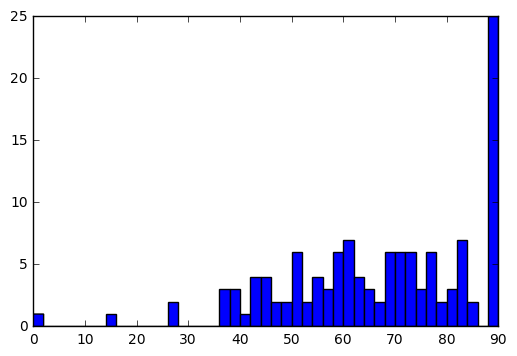

In [11]:
plt.hist(incls, bins=45);

In [12]:
len(incls)

126

## VENGA

http://iopscience.iop.org/article/10.1088/0004-6256/145/5/138/pdf

In [29]:
venga_card = {'Name' : 'VENGA', r'$\Sigma_{s}$' : '+', r'$\sigma_{s}$' : '+', r'$H_{\alpha} (SFR)$' : '+'}
SurveyCard(venga_card)

Name,VENGA
$\sigma_{s}$,+
$\Sigma_{s}$,+
$H_{\alpha} (SFR)$,+


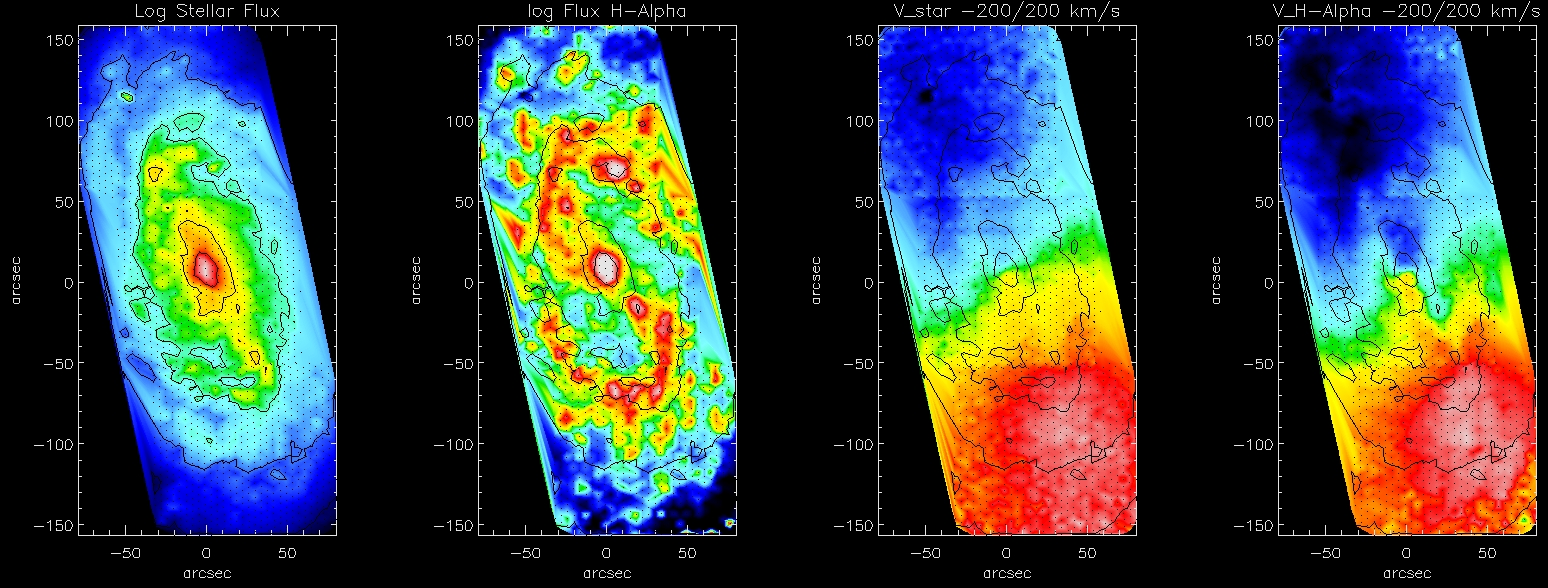

In [28]:
Image('https://users.obs.carnegiescience.edu/gblancm/venga_files/NGC2903_plots.jpg', width=900)

In [19]:
venga = '''NGC 337 ... ...
NGC 628 0.10a 1.35
NGC 1042 ... ...
NGC 1068 ... ...
NGC 2775 0.61b 4.85
NGC 2841 0.17c 2.97
NGC 2903 0.09c 0.42
NGC 3147 0.25a 3.66
NGC 3166 0.25b 0.56
NGC 3198 0.11a 5.12
NGC 3227 ... ...
NGC 3351 0.17c 1.51
NGC 3521 0.10a 3.20
NGC 3627 0.08c 2.90
NGC 3938 0.07b 1.18
NGC 3949 ... ...
NGC 4013 ... ...
NGC 4254 0.39b 2.68
NGC 4314 ... ...
NGC 4450 0.17b 2.26
NGC 4569 0.06c 1.90
NGC 4826 0.13c 3.94
NGC 5055 0.26a 1.84
NGC 5194 ... ...
NGC 5713 0.33b 1.84
NGC 5981 ... ...
NGC 6503 ... ...
NGC 6946 ... ...
NGC 7479 0.09b 1.09
NGC 7331 ... ...'''

In [20]:
venga = [''.join(l.split(' ')[0:2]) for l in venga.split('\n')]

In [21]:
venga

['NGC337',
 'NGC628',
 'NGC1042',
 'NGC1068',
 'NGC2775',
 'NGC2841',
 'NGC2903',
 'NGC3147',
 'NGC3166',
 'NGC3198',
 'NGC3227',
 'NGC3351',
 'NGC3521',
 'NGC3627',
 'NGC3938',
 'NGC3949',
 'NGC4013',
 'NGC4254',
 'NGC4314',
 'NGC4450',
 'NGC4569',
 'NGC4826',
 'NGC5055',
 'NGC5194',
 'NGC5713',
 'NGC5981',
 'NGC6503',
 'NGC6946',
 'NGC7479',
 'NGC7331']

In [24]:
ned_venga = []
for venganame in venga:
    result_table = Ned.query_object(venganame)
    ned_venga.append(result_table[0]['Object Name'])

ned_carma = []
for carmaname in carmaedge:
    result_table = Ned.query_object(carmaname)
    ned_carma.append(result_table[0]['Object Name'])
    
print set(ned_carma).intersection(ned_venga)

set([])


## Hi KINEMATICS AND MASS DISTRIBUTION OF MESSIER 33

[Hi KINEMATICS AND MASS DISTRIBUTION OF MESSIER 33](https://arxiv.org/pdf/1706.04248.pdf) - есть подробная карта дисперсий атомарного водорода $\rm{HI}$ для NGC~598 (M33).

## WHISP

http://www.astro.rug.nl/~whisp/Database/OverviewCatalog/ListByName/listing_by_name.html

In [24]:
whisp_card = {'Name' : 'WHISP', r'$\Sigma_{\rm{HI}}$' : '+'}

In [25]:
SurveyCard(whisp_card)

Name,WHISP
$\Sigma_{\rm{HI}}$,+


In [3]:
whisp_url = 'http://www.astro.rug.nl/~whisp/Database/OverviewCatalog/ListByName/listing_by_name.html'
html = requests.get(whisp_url).content

In [4]:
from BeautifulSoup import BeautifulSoup
soup = BeautifulSoup(html)

In [5]:
whisp_galaxies = []
for gal in soup.findAll('a', target="_top")[2:]:
    g = str(gal.string)
    whisp_galaxies.append(int(g.replace('/', ' ').replace('(', ' ').replace('\x08', ' ').split(' ')[2]))

In [6]:
len(unique(whisp_galaxies))

342

In [8]:
print ['UGC ' + str(l) for l in whisp_galaxies]

['UGC 79', 'UGC 89', 'UGC 94', 'UGC 192', 'UGC 232', 'UGC 485', 'UGC 499', 'UGC 508', 'UGC 528', 'UGC 608', 'UGC 622', 'UGC 623', 'UGC 624', 'UGC 624', 'UGC 625', 'UGC 655', 'UGC 690', 'UGC 718', 'UGC 731', 'UGC 798', 'UGC 1013', 'UGC 1178', 'UGC 1249', 'UGC 1256', 'UGC 1281', 'UGC 1286', 'UGC 1305', 'UGC 1310', 'UGC 1313', 'UGC 1317', 'UGC 1437', 'UGC 1437', 'UGC 1501', 'UGC 1541', 'UGC 1550', 'UGC 1633', 'UGC 1810', 'UGC 1856', 'UGC 1886', 'UGC 1913', 'UGC 1993', 'UGC 2023', 'UGC 2034', 'UGC 2045', 'UGC 2053', 'UGC 2065', 'UGC 2069', 'UGC 2080', 'UGC 2082', 'UGC 2141', 'UGC 2141', 'UGC 2154', 'UGC 2183', 'UGC 2193', 'UGC 2455', 'UGC 2459', 'UGC 2459', 'UGC 2487', 'UGC 2487', 'UGC 2487', 'UGC 2491', 'UGC 2503', 'UGC 2800', 'UGC 2855', 'UGC 2866', 'UGC 2916', 'UGC 2916', 'UGC 2916', 'UGC 2941', 'UGC 2941', 'UGC 2942', 'UGC 2953', 'UGC 3013', 'UGC 3137', 'UGC 3205', 'UGC 3205', 'UGC 3205', 'UGC 3205', 'UGC 3273', 'UGC 3326', 'UGC 3334', 'UGC 3344', 'UGC 3354', 'UGC 3371', 'UGC 3382', 'U

## DiskMass

https://www.aanda.org/articles/aa/pdf/2013/09/aa20515-12.pdf

## THE RELATIONSHIP BETWEEN GAS CONTENT AND STAR FORMATION IN MOLECULE-RICH SPIRAL GALAXIES

http://iopscience.iop.org/article/10.1086/339287/pdf

## HALOGAS

https://www.aanda.org/articles/aa/pdf/2011/02/aa15938-10.pdf